In [34]:
import pandas as pd
import quandl,datetime
import math
import numpy as np
from sklearn import preprocessing, svm #scale, regresions, cross shuffle stats sepeareate data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC  
from sklearn.datasets import load_iris 

import matplotlib.pyplot as plt
from matplotlib import style
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [3]:
start ='2017-12-01'
end = '2023-07-31'

df = pdr.get_data_yahoo("TSLA", start="2017-12-01", end="2023-07-31")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,20.362667,20.688000,20.336666,20.435333,20.435333,64393500
2017-12-04,20.433332,20.551332,20.040667,20.346666,20.346666,87526500
2017-12-05,20.133333,20.533333,20.066668,20.246668,20.246668,69697500
2017-12-06,20.006666,20.892668,20.000000,20.884001,20.884001,107929500
2017-12-07,20.799999,21.242001,20.736668,20.749332,20.749332,71709000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500
2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000


In [5]:
df.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,20.362667,20.688000,20.336666,20.435333,20.435333,64393500
1,2017-12-04,20.433332,20.551332,20.040667,20.346666,20.346666,87526500
2,2017-12-05,20.133333,20.533333,20.066668,20.246668,20.246668,69697500
3,2017-12-06,20.006666,20.892668,20.000000,20.884001,20.884001,107929500
4,2017-12-07,20.799999,21.242001,20.736668,20.749332,20.749332,71709000
...,...,...,...,...,...,...,...
1417,2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500
1418,2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300
1419,2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
1420,2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300


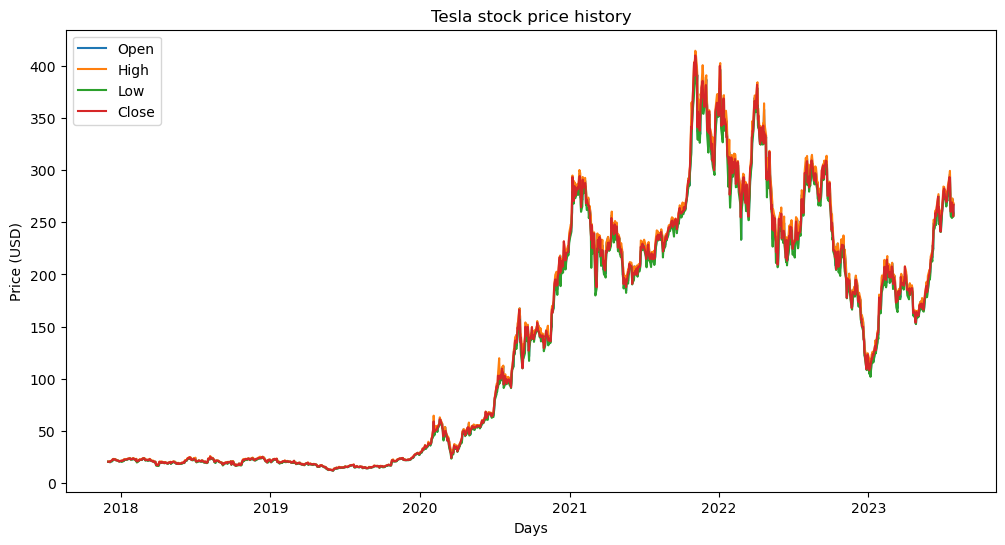

In [6]:
plt.figure(figsize = (12,6))
plt.plot(df["Open"])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('Tesla stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,20.362667,20.688000,20.336666,20.435333,20.435333,64393500
2017-12-04,20.433332,20.551332,20.040667,20.346666,20.346666,87526500
2017-12-05,20.133333,20.533333,20.066668,20.246668,20.246668,69697500
2017-12-06,20.006666,20.892668,20.000000,20.884001,20.884001,107929500
2017-12-07,20.799999,21.242001,20.736668,20.749332,20.749332,71709000
...,...,...,...,...,...,...
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500
2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200


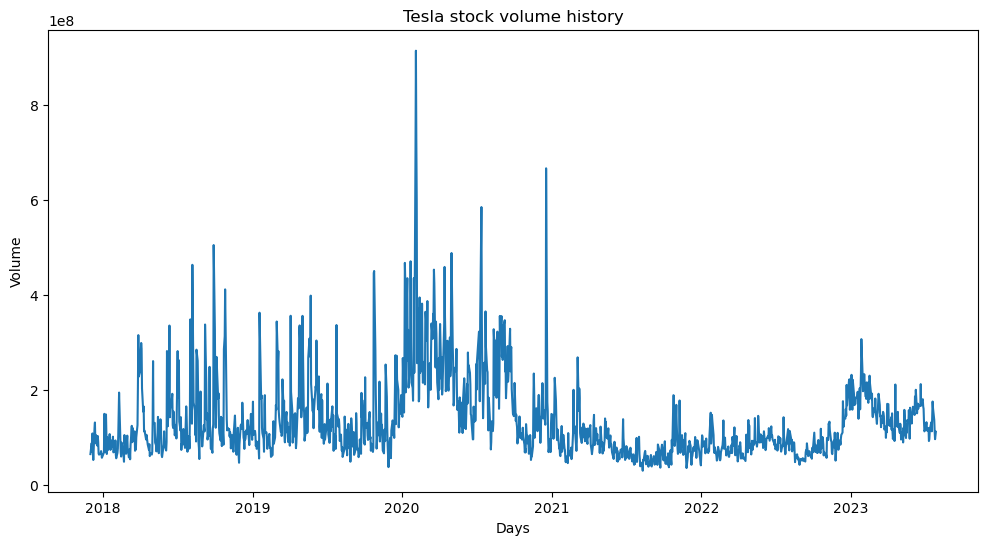

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df["Volume"])
plt.title('Tesla stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2017-12-01           NaN
2017-12-04           NaN
2017-12-05           NaN
2017-12-06           NaN
2017-12-07           NaN
                 ...    
2023-07-24    208.845499
2023-07-25    209.470599
2023-07-26    210.205099
2023-07-27    210.784300
2023-07-28    211.510600
Name: Close, Length: 1422, dtype: float64

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2017-12-01          NaN
2017-12-04          NaN
2017-12-05          NaN
2017-12-06          NaN
2017-12-07          NaN
                ...    
2023-07-24    194.00470
2023-07-25    194.12705
2023-07-26    194.25815
2023-07-27    194.42135
2023-07-28    194.63875
Name: Close, Length: 1422, dtype: float64

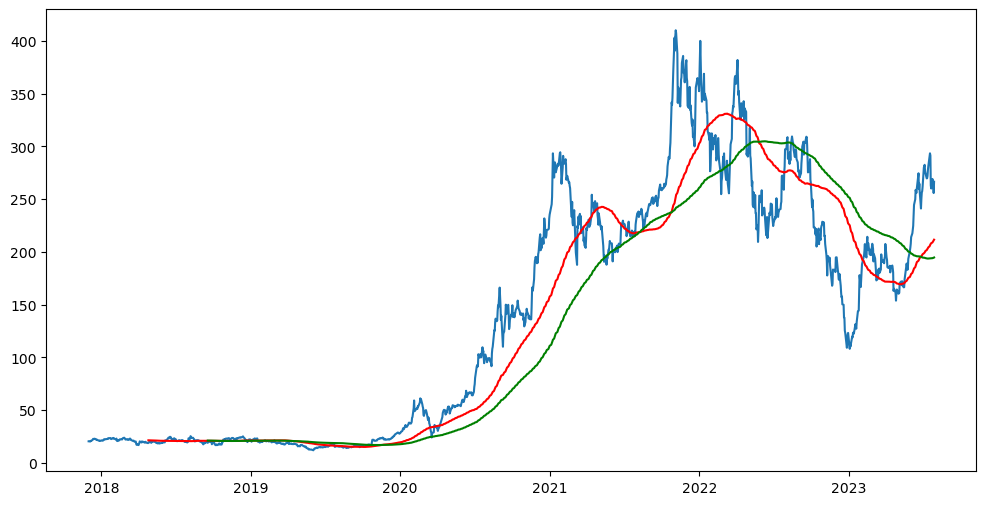

In [11]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r') 
plt.plot(ma200,'g')

In [12]:
df.shape

(1422, 6)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [14]:
data_target = df.filter(['Close'])

target = data_target.values


training_data_len = math.ceil(len(target)* 0.75)
training_data_len


sc = MinMaxScaler(feature_range=(0,1))
training_scaled_data = sc.fit_transform(target)
training_scaled_data

array([[0.02136476],
       [0.021142  ],
       [0.02089077],
       ...,
       [0.63415616],
       [0.61244973],
       [0.6394069 ]])

In [15]:
training_scaled_data.shape 

(1422, 1)

In [16]:

train_data = training_scaled_data[0:training_data_len  , : ]

x_train = []
y_train = []
for i in range(180, len(train_data)):
    x_train.append(train_data[i-180:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('Number of rows and columns: ', x_train.shape)

Number of rows and columns:  (887, 180, 1)


In [17]:
x_train.shape

(887, 180, 1)

In [18]:
#ML Model
from keras.layers import Dense,Dropout, LSTM, Embedding
from keras.models import Sequential

In [19]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 180, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 180, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 180, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 180, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 180, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 180, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [25]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train, epochs =50, batch_size = 32)

Epoch 1/50
28/28 [==============================] - 38s 593ms/step - loss: 0.0242 - accuracy: 0.0011
Epoch 2/50
28/28 [==============================] - 16s 562ms/step - loss: 0.0059 - accuracy: 0.0023
Epoch 3/50
28/28 [==============================] - 16s 554ms/step - loss: 0.0049 - accuracy: 0.0011
Epoch 4/50
28/28 [==============================] - 15s 546ms/step - loss: 0.0044 - accuracy: 0.0023
Epoch 5/50
28/28 [==============================] - 16s 555ms/step - loss: 0.0038 - accuracy: 0.0023
Epoch 6/50
28/28 [==============================] - 16s 554ms/step - loss: 0.0042 - accuracy: 0.0023
Epoch 7/50
28/28 [==============================] - 16s 555ms/step - loss: 0.0047 - accuracy: 0.0023
Epoch 8/50
28/28 [==============================] - 16s 555ms/step - loss: 0.0040 - accuracy: 0.0023
Epoch 9/50
28/28 [==============================] - 16s 563ms/step - loss: 0.0037 - accuracy: 0.0023
Epoch 10/50
28/28 [==============================] - 16s 563ms/step - loss: 0.0043 - accura

In [26]:
model.save('my_model.keras')

In [27]:
# Getting the predicted stock price
test_data = training_scaled_data[training_data_len - 180: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test =  target[training_data_len : , : ]
for i in range(180,len(test_data)):
    x_test.append(test_data[i-180:i,0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print('Number of rows and columns: ', x_test.shape)

Number of rows and columns:  (355, 180, 1)


In [28]:
# Making predictions using the test dataset
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

12/12 [==============================] - 7s 194ms/step


C:\Users\satvi\AppData\Local\Temp\ipykernel_15052\579260115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_stock_price


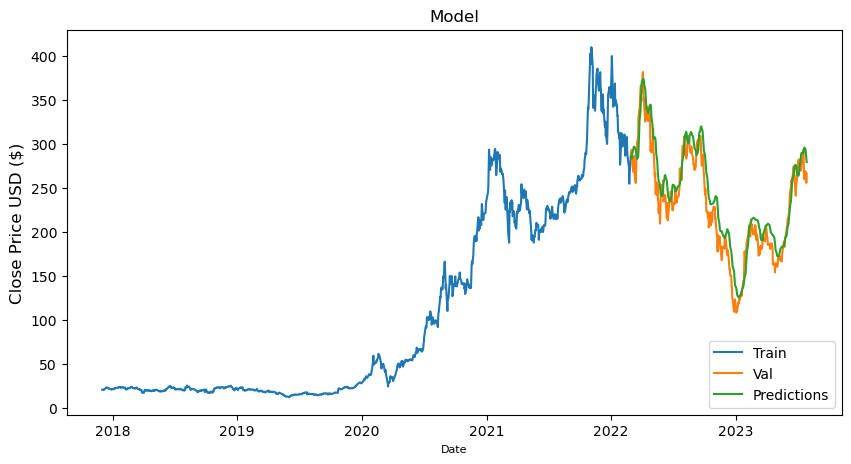

In [29]:
# Visualising the results
train = data_target[:training_data_len]
valid = data_target[training_data_len:]
valid['Predictions'] = predicted_stock_price
plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
valid

,Close,Predictions
Date,,
2022-03-01,288.123322,284.410889
2022-03-02,293.296661,283.346863
2022-03-03,279.763336,285.580597
2022-03-04,279.429993,289.578918
2022-03-07,268.193329,293.727448
...,...,...
2023-07-24,269.059998,294.796783
2023-07-25,265.279999,291.947723
2023-07-26,264.350006,287.946594


In [32]:
y_inverse=sc.inverse_transform(y_test.reshape(-1,1))

In [38]:
rmse_sent = math.sqrt(mean_squared_error(y_inverse, predicted_stock_price))/(100*252)
rmse_sent

3.7602949457573147

## Popular Stocks
#### Apple Inc. (AAPL)
#### Tesla, Inc. (TSLA)
#### Microsoft Corporation (MSFT)
#### Tata Motors Limited (TATAMOTORS.NS)
#### Tata Steel Limited (TATASTEEL.NS)
#### Alphabet Inc. (GOOG)
#### Infosys Limited (INFY)
#### Tata Consultancy Services Limited (TCS.NS)

### Streamlit Link: http://localhost:8501